In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut # use this lib
from sklearn.model_selection import KFold  # or just kfold with n 
from sklearn.metrics import mean_squared_error # MSE calculation (guess,true)
import statistics #use statistics.stdev(list)

In [3]:


mu, sigma = 0, 1 # mean and standard deviation
x = np.random.normal(mu, sigma, 100)
y = np.random.normal(mu, sigma, 100)

In [4]:
index = 0 
for i in x :
    y_i = i - 2 * i**2 
    y_i = y[index] + y_i
    y[index] = y_i
    index += 1 


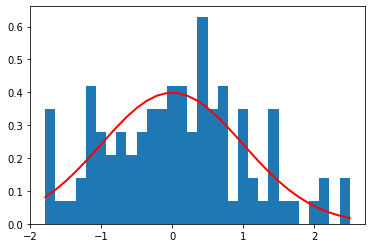

In [5]:
# Verify X
count, bins, ignored = plt.hist(x, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

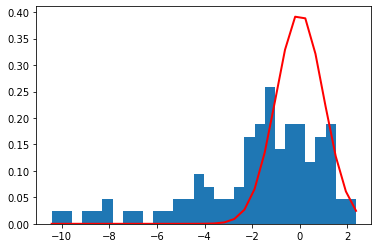

In [6]:
# Verify Y
count, bins, ignored = plt.hist(y, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [13]:
# Setting up comparision values
x_2_base = []
x_3_base = []
x_4_base = []
for i in range(0, len(x)):
    x_2_base.append(x[i] ** 2)
    x_3_base.append(x[i] ** 3)
    x_4_base.append(x[i] ** 4) 
    
x_2 = np.array([x, x_2_base])
x_3 = np.array([x, x_2_base, x_3_base])
x_4 = np.array([x, x_2_base, x_3_base, x_4_base])

print(x_3_base) 


[[ 9.59420212e-01 -3.44846137e-02 -1.48068206e+00 -1.14341073e+00
  -8.57853347e-01  4.65651467e-01 -2.25757817e-01 -1.17979819e-01
   1.44279948e+00  2.11988355e+00  1.18381370e+00  8.79257161e-02
  -4.47954640e-01 -3.53776644e-01 -1.20258313e+00 -1.57555957e+00
  -1.69227267e-01 -1.03634439e+00 -1.76446498e+00  6.97687005e-01
  -6.28266882e-01 -6.41852110e-01 -1.20714406e+00 -2.60334661e-01
  -1.72383216e+00  3.67820449e-01  4.00739302e-01  1.01801440e+00
   2.77301718e-01  1.38290578e+00  1.48348457e+00  1.04920952e+00
  -7.45504130e-01 -1.55146142e-01  1.76657678e-02  5.23945530e-01
   1.43984969e-01  5.90193184e-02 -1.04214836e+00  3.08239524e-01
  -1.22497685e+00 -7.54937464e-01  6.49443884e-01 -1.23220035e-01
  -1.33314923e+00  5.04894464e-01 -5.14241044e-01  1.77283516e-02
   7.40169523e-01  3.57512067e-01  2.15918479e+00  2.05712673e-01
  -8.56391709e-01  6.86027505e-01  4.50766698e-01 -1.70129104e+00
  -7.87388915e-01  1.42276735e+00  1.06447373e+00  1.29667319e+00
   3.59547

In [8]:
def count_mse(x,y):
    #print(y)
    MSE , STD_DEV = 0 ,0
    
    # leave one out
    loocv = LeaveOneOut()

    #number of splits
    loocv.get_n_splits(x) 
    x_test_mse_list = []
    y_test_mse_list = []
    
    try:
        ## has columns
        print(x[0][0])
        for i in x :
            ### TODO 
            for train_index, test_index in loocv.split(i): 
                X_train, X_test = i[train_index], i[test_index]
                y_train, y_test = y[train_index], y[test_index]   
#                 print("X_train : " , X_train,"\nX_test:",  X_test, "\n y_train :", y_train, "\n y_test", y_test)
                x_test_mse_list.append(X_test)
                y_test_mse_list.append(y_test)
            
    except:
        # single column
        for train_index, test_index in loocv.split(x): 
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]   
#             print("X_train : " , X_train,"\nX_test:",  X_test, "\n y_train :", y_train, "\n y_test", y_test)
            x_test_mse_list.append(X_test)
            y_test_mse_list.append(y_test)
    print(y_test_mse_list)
    
    std_dev_list = []  
    x_test_mse_list = np.asarray(x_test_mse_list) 
    is_column = False
    for i in range(0 , len(x_test_mse_list)): 
        try:
            std_dev_list_columns = []
            for x in range(0 , len(x_test_mse_list[i])): 

                for q in range(0, len(x_test_mse_list[i][x])): 
                    std_dev_list_columns.append(x_test_mse_list[i][x][q])
            std_dev_list.append(std_dev_list_columns)
        except:
            std_dev_list.append(x_test_mse_list[i][0])
            is_column = True
            pass
         
    print("is column?" , is_column)
    if is_column is False:
        mean_square_error_list = []
        for i in std_dev_list: 
            print("i", i , "\ny_test_mse_list" , y_test_mse_list)
            mean_square_error_list.append(mean_squared_error(i, y_test_mse_list)) 
        MSE = sum(mean_square_error_list) / len(mean_square_error_list)
    else: 
        print("std_dev_list" , std_dev_list , "\ny_test_mse_list" , y_test_mse_list)
        MSE = mean_squared_error(std_dev_list, y_test_mse_list)
    print(MSE)
    return MSE, STD_DEV
x2_mse , x2_std_dev = count_mse(x_2, y)

#x1_mse , x1_std_dev = count_mse(x,y)

0.9594202118046673
[array([-0.57351797]), array([1.16348557]), array([-5.20426901]), array([-4.85318512]), array([-2.06652965]), array([0.44526933]), array([-0.24373603]), array([1.33971942]), array([-2.31150331]), array([-5.10330628]), array([-1.38041718]), array([-1.0507612]), array([-1.31245063]), array([-1.57013136]), array([-3.97353324]), array([-7.31073377]), array([1.63610866]), array([-2.99808649]), array([-8.63409857]), array([-1.86696618]), array([-2.26977998]), array([-1.34760302]), array([-3.75070725]), array([-1.7072492]), array([-7.8835885]), array([1.19207703]), array([-0.2894232]), array([-1.87695014]), array([2.36216155]), array([-0.13451224]), array([-1.08377369]), array([-0.45053382]), array([-0.24745633]), array([0.33323504]), array([-0.14434588]), array([1.93247605]), array([-1.49819789]), array([0.19084107]), array([-4.16084425]), array([0.95248638]), array([-4.08596226]), array([-1.9280765]), array([-2.02870235]), array([1.00632183]), array([-5.43246847]), array(

In [9]:
x1_mse , x1_std_dev = count_mse(x,y)

[array([-0.57351797]), array([1.16348557]), array([-5.20426901]), array([-4.85318512]), array([-2.06652965]), array([0.44526933]), array([-0.24373603]), array([1.33971942]), array([-2.31150331]), array([-5.10330628]), array([-1.38041718]), array([-1.0507612]), array([-1.31245063]), array([-1.57013136]), array([-3.97353324]), array([-7.31073377]), array([1.63610866]), array([-2.99808649]), array([-8.63409857]), array([-1.86696618]), array([-2.26977998]), array([-1.34760302]), array([-3.75070725]), array([-1.7072492]), array([-7.8835885]), array([1.19207703]), array([-0.2894232]), array([-1.87695014]), array([2.36216155]), array([-0.13451224]), array([-1.08377369]), array([-0.45053382]), array([-0.24745633]), array([0.33323504]), array([-0.14434588]), array([1.93247605]), array([-1.49819789]), array([0.19084107]), array([-4.16084425]), array([0.95248638]), array([-4.08596226]), array([-1.9280765]), array([-2.02870235]), array([1.00632183]), array([-5.43246847]), array([-0.65020263]), arr

In [10]:
x2_mse , x2_std_dev = count_mse(x_2, y)
# 因為line13沒有拆解到全部的所以會錯

0.9594202118046673
[array([-0.57351797]), array([1.16348557]), array([-5.20426901]), array([-4.85318512]), array([-2.06652965]), array([0.44526933]), array([-0.24373603]), array([1.33971942]), array([-2.31150331]), array([-5.10330628]), array([-1.38041718]), array([-1.0507612]), array([-1.31245063]), array([-1.57013136]), array([-3.97353324]), array([-7.31073377]), array([1.63610866]), array([-2.99808649]), array([-8.63409857]), array([-1.86696618]), array([-2.26977998]), array([-1.34760302]), array([-3.75070725]), array([-1.7072492]), array([-7.8835885]), array([1.19207703]), array([-0.2894232]), array([-1.87695014]), array([2.36216155]), array([-0.13451224]), array([-1.08377369]), array([-0.45053382]), array([-0.24745633]), array([0.33323504]), array([-0.14434588]), array([1.93247605]), array([-1.49819789]), array([0.19084107]), array([-4.16084425]), array([0.95248638]), array([-4.08596226]), array([-1.9280765]), array([-2.02870235]), array([1.00632183]), array([-5.43246847]), array(

y_test_mse_list [array([-0.57351797]), array([1.16348557]), array([-5.20426901]), array([-4.85318512]), array([-2.06652965]), array([0.44526933]), array([-0.24373603]), array([1.33971942]), array([-2.31150331]), array([-5.10330628]), array([-1.38041718]), array([-1.0507612]), array([-1.31245063]), array([-1.57013136]), array([-3.97353324]), array([-7.31073377]), array([1.63610866]), array([-2.99808649]), array([-8.63409857]), array([-1.86696618]), array([-2.26977998]), array([-1.34760302]), array([-3.75070725]), array([-1.7072492]), array([-7.8835885]), array([1.19207703]), array([-0.2894232]), array([-1.87695014]), array([2.36216155]), array([-0.13451224]), array([-1.08377369]), array([-0.45053382]), array([-0.24745633]), array([0.33323504]), array([-0.14434588]), array([1.93247605]), array([-1.49819789]), array([0.19084107]), array([-4.16084425]), array([0.95248638]), array([-4.08596226]), array([-1.9280765]), array([-2.02870235]), array([1.00632183]), array([-5.43246847]), array([-0

In [11]:
x3_mse , x3_std_dev = count_mse(x_3, y)

0.9594202118046673
[array([-0.57351797]), array([1.16348557]), array([-5.20426901]), array([-4.85318512]), array([-2.06652965]), array([0.44526933]), array([-0.24373603]), array([1.33971942]), array([-2.31150331]), array([-5.10330628]), array([-1.38041718]), array([-1.0507612]), array([-1.31245063]), array([-1.57013136]), array([-3.97353324]), array([-7.31073377]), array([1.63610866]), array([-2.99808649]), array([-8.63409857]), array([-1.86696618]), array([-2.26977998]), array([-1.34760302]), array([-3.75070725]), array([-1.7072492]), array([-7.8835885]), array([1.19207703]), array([-0.2894232]), array([-1.87695014]), array([2.36216155]), array([-0.13451224]), array([-1.08377369]), array([-0.45053382]), array([-0.24745633]), array([0.33323504]), array([-0.14434588]), array([1.93247605]), array([-1.49819789]), array([0.19084107]), array([-4.16084425]), array([0.95248638]), array([-4.08596226]), array([-1.9280765]), array([-2.02870235]), array([1.00632183]), array([-5.43246847]), array(

In [12]:
x4_mse , x4_std_dev = count_mse(x_4, y)

0.9594202118046673
[array([-0.57351797]), array([1.16348557]), array([-5.20426901]), array([-4.85318512]), array([-2.06652965]), array([0.44526933]), array([-0.24373603]), array([1.33971942]), array([-2.31150331]), array([-5.10330628]), array([-1.38041718]), array([-1.0507612]), array([-1.31245063]), array([-1.57013136]), array([-3.97353324]), array([-7.31073377]), array([1.63610866]), array([-2.99808649]), array([-8.63409857]), array([-1.86696618]), array([-2.26977998]), array([-1.34760302]), array([-3.75070725]), array([-1.7072492]), array([-7.8835885]), array([1.19207703]), array([-0.2894232]), array([-1.87695014]), array([2.36216155]), array([-0.13451224]), array([-1.08377369]), array([-0.45053382]), array([-0.24745633]), array([0.33323504]), array([-0.14434588]), array([1.93247605]), array([-1.49819789]), array([0.19084107]), array([-4.16084425]), array([0.95248638]), array([-4.08596226]), array([-1.9280765]), array([-2.02870235]), array([1.00632183]), array([-5.43246847]), array(

is column? True
std_dev_list [0.9594202118046673, -0.03448461368236451, -1.4806820617273224, -1.143410725990752, -0.857853346709073, 0.4656514669870256, -0.22575781722442645, -0.11797981911278602, 1.4427994783488731, 2.119883551690702, 1.1838136958545922, 0.08792571607558161, -0.44795463958863335, -0.3537766437900944, -1.2025831324009015, -1.5755595672563398, -0.16922726671884827, -1.0363443939708081, -1.7644649826966008, 0.6976870049331692, -0.6282668816927698, -0.6418521095212336, -1.2071440578866184, -0.2603346611409557, -1.7238321615601464, 0.3678204485710445, 0.40073930181501943, 1.0180143982212988, 0.27730171837706113, 1.382905778477406, 1.4834845675877115, 1.0492095195028728, -0.745504130238026, -0.15514614187640355, 0.017665767810852225, 0.5239455296495441, 0.1439849685059544, 0.05901931839625932, -1.0421483557208506, 0.30823952382555037, -1.2249768534602217, -0.7549374644174318, 0.6494438844515233, -0.12322003505397944, -1.3331492336956494, 0.5048944642771581, -0.5142410436002

y_test_mse_list [array([-0.57351797]), array([1.16348557]), array([-5.20426901]), array([-4.85318512]), array([-2.06652965]), array([0.44526933]), array([-0.24373603]), array([1.33971942]), array([-2.31150331]), array([-5.10330628]), array([-1.38041718]), array([-1.0507612]), array([-1.31245063]), array([-1.57013136]), array([-3.97353324]), array([-7.31073377]), array([1.63610866]), array([-2.99808649]), array([-8.63409857]), array([-1.86696618]), array([-2.26977998]), array([-1.34760302]), array([-3.75070725]), array([-1.7072492]), array([-7.8835885]), array([1.19207703]), array([-0.2894232]), array([-1.87695014]), array([2.36216155]), array([-0.13451224]), array([-1.08377369]), array([-0.45053382]), array([-0.24745633]), array([0.33323504]), array([-0.14434588]), array([1.93247605]), array([-1.49819789]), array([0.19084107]), array([-4.16084425]), array([0.95248638]), array([-4.08596226]), array([-1.9280765]), array([-2.02870235]), array([1.00632183]), array([-5.43246847]), array([-0